# Hospital Readmission Prediction

**Overview**:This project aims to estimate hospital readmissions in order to reduce healthcare insurance costs and improve patient outcomes. The dataset used was the _Diabetes 130-US Hospitals for Years 1999-2008_ dataset, found in the UC Irvine Machine Learing Repository. The dataset includes the hospital records of patients from 130 American hospitals who were diagnosed with diabetes and stayed for up to fourteen days.<br>
**Purpose**: to predict whether a patient will be readmitted within thirty days of discharge. 

## Data Exploration

In [1]:
import pandas as pd

In [2]:
diabetic_data = pd.read_csv('diabetes_data/diabetic_data.csv')
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# 101,766 rows and 50 columns
diabetic_data.shape

(101766, 50)

In [4]:
diabetic_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetic_data['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [7]:
len(diabetic_data)

101766

In [8]:
len(diabetic_data[diabetic_data['weight'] == '?']) / len(diabetic_data)

0.9685847925633315

In [9]:
len(diabetic_data[diabetic_data['payer_code'] == '?']) / len(diabetic_data)

0.395574160328597

In [10]:
len(diabetic_data[diabetic_data['medical_specialty'] == '?']) / len(diabetic_data)

0.49082208203132677

In [11]:
diabetic_data['examide'].unique()

array(['No'], dtype=object)

In [12]:
diabetic_data['citoglipton'].unique()

array(['No'], dtype=object)

In [13]:
diabetic_data['diag_1'].value_counts(normalize=True).sort_values(ascending=False)

diag_1
428     0.067429
414     0.064668
786     0.039463
410     0.035513
486     0.034471
          ...   
832     0.000010
E909    0.000010
V07     0.000010
299     0.000010
V51     0.000010
Name: proportion, Length: 717, dtype: float64

In [14]:
diabetic_data['metformin-rosiglitazone'].value_counts(normalize=True)

metformin-rosiglitazone
No        0.99998
Steady    0.00002
Name: proportion, dtype: float64

In [15]:
diabetic_data['metformin-pioglitazone'].value_counts(normalize=True)

metformin-pioglitazone
No        0.99999
Steady    0.00001
Name: proportion, dtype: float64

**Columns to Drop**:<br>
* `encounter_id`: unique identifier --> not useful for prediction
* `weight`: too many missing values; about 97% are missing
* `payer_code`: too many missing values; about 40% missing
* `medical_specialty`: too many missing values; about 49% missing
* `examide`: all values in this columns are 'No'; the drug is very rarely prescribed
* `citoglipton`: all values in this column are 'No'; the drug is very rarely prescribed
* `metformin-rosiglitazone`: almost all values in this column are 'No'
* `metformin-pioglitazone`: almost all values in this column are 'No'
Source on how much missing data is too much: https://pmc.ncbi.nlm.nih.gov/articles/PMC6547017/#:~:text=Statistical%20guidance%20articles%20have%20stated,18%5D%2C%20%5B19%5D.

In [16]:
diabetic_dropped = diabetic_data.drop(['encounter_id', 'weight', 'payer_code', 'medical_specialty', 'examide', 'citoglipton',\
                                        'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1)
diabetic_dropped.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,No,Up,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,No,Up,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO


In [17]:
diabetic_dropped['race'].value_counts(normalize=True)

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

In [18]:
diabetic_dropped['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [19]:
# Identify the target variable (readmitted) and convert it into a binary classification 
diabetic_dropped['readmitted'] = diabetic_dropped['readmitted'].map({'NO': 0, '<30': 1, '>30': 0})
diabetic_dropped

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,No,Up,No,No,No,Ch,Yes,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,No,Up,No,No,No,Ch,Yes,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,No,Steady,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,No,No,Down,No,No,No,Ch,Yes,0
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,No,No,Steady,No,No,No,No,Yes,0
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,No,No,Down,No,No,No,Ch,Yes,0
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,No,No,Up,No,No,No,Ch,Yes,0


## Univariate Analysis

In [20]:
# Some patients do appear more than once
diabetic_dropped['patient_nbr'].value_counts(normalize=True)

patient_nbr
88785891     0.000393
43140906     0.000275
1660293      0.000226
88227540     0.000226
23199021     0.000226
               ...   
11005362     0.000010
98252496     0.000010
1019673      0.000010
13396320     0.000010
175429310    0.000010
Name: proportion, Length: 71518, dtype: float64

In [21]:
# Frequency of each racial group
diabetic_dropped['race'].value_counts(normalize=True)

race
Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64

In [22]:
# Frequency of each gender
diabetic_dropped['gender'].value_counts(normalize=True)
# There are some unknown or invalid genders, but at a very small proportion (0.0029%)

gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64

In [23]:
# Frequency of each age group
diabetic_dropped['age'].value_counts(normalize=True)
# The most common age groups are seniors and older adults. The top 3 age groups are: [70-80), [60-70), and [50-60)

age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64

In [24]:
# Frequency of admission types
# more than half are emergencies
diabetic_dropped['admission_type_id'].value_counts(normalize=True)

admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: proportion, dtype: float64

In [25]:
# Frequency of discharge disposition
diabetic_dropped['discharge_disposition_id'].value_counts(normalize=True)

discharge_disposition_id
1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
22    0.019584
11    0.016135
5     0.011635
25    0.009718
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003655
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    0.000138
16    0.000108
19    0.000079
10    0.000059
27    0.000049
12    0.000029
20    0.000020
Name: proportion, dtype: float64

In [26]:
# Frequency of sources of admission
# more than half are emergency room
diabetic_dropped['admission_source_id'].value_counts(normalize=True)

admission_source_id
7     0.564963
1     0.290519
17    0.066633
4     0.031317
6     0.022247
2     0.010848
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
14    0.000020
11    0.000020
25    0.000020
13    0.000010
Name: proportion, dtype: float64

In [27]:
# On average, about 4.4 days spent in the hospital
diabetic_dropped['time_in_hospital'].mean()

np.float64(4.395986871843248)

In [28]:
# Range of time spent in the hospital is 13
diabetic_dropped['time_in_hospital'].max() - diabetic_dropped['time_in_hospital'].min()


np.int64(13)

In [29]:
sum(diabetic_dropped['readmitted']) / len(diabetic_dropped)

0.11159915885462728

In [30]:
# On average, 43.1 lab procedures per encounter
diabetic_dropped['num_lab_procedures'].mean()

np.float64(43.09564098028811)

In [31]:
# Typically, about 1.34 other procedures
diabetic_dropped['num_procedures'].mean()

np.float64(1.339730361810428)

In [32]:
# spread of medication counts
diabetic_dropped['num_medications'].describe()

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

In [33]:
patient_visits = diabetic_dropped.groupby('patient_nbr')[['number_outpatient', 'number_emergency', 'number_inpatient']].max()
proportion_outpatient = (patient_visits['number_outpatient'] > 0).mean()
proportion_emergency = (patient_visits['number_emergency'] > 0).mean()
proportion_inpatient = (patient_visits['number_inpatient'] > 0).mean()

print(f"Proportion with at least one outpatient visit: {proportion_outpatient:.2%}")
print(f"Proportion with at least one emergency visit: {proportion_emergency:.2%}")
print(f"Proportion with at least one inpatient visit: {proportion_inpatient:.2%}")

Proportion with at least one outpatient visit: 15.76%
Proportion with at least one emergency visit: 9.98%
Proportion with at least one inpatient visit: 29.39%


In [34]:
# On average, about 7.42 diagnoses per encounter
diabetic_dropped['number_diagnoses'].mean()

np.float64(7.422606764538254)

In [35]:
diabetic_dropped['diag_1'].value_counts(normalize=True).iloc[0:10]

diag_1
428    0.067429
414    0.064668
786    0.039463
410    0.035513
486    0.034471
427    0.027180
491    0.022355
715    0.021137
682    0.020066
434    0.019928
Name: proportion, dtype: float64

Source: https://www.aapc.com/codes/icd9-codes-range/ <br>
Top 10 first diagnoses:<br>
1) 428: heart failure
2) 414: other forms of chronic oschemic heart disease
3) 786: symptoms involving respiratory system and other chest symptoms
4) 410: acute myocardial infarction
5) 486: pneumonia, organism unspecifed
6) 427: conduction disorders
7) 491: chronic bronchitis
8) 715: osteoarthritis and allied disorders
9) 682: other cellulitis and abscess
10) 434: occlusion of cerebral arteries

In [36]:
# Glucose serum was tested about 5.25% of the time. 
len(diabetic_dropped[~diabetic_dropped['max_glu_serum'].isna()]) / len(diabetic_dropped)

0.05253227993632451

In [37]:
# The common results were almost half normal
diabetic_dropped['max_glu_serum'].value_counts(normalize=True)

max_glu_serum
Norm    0.485784
>200    0.277778
>300    0.236438
Name: proportion, dtype: float64

In [38]:
# A1C was tested about 16.72% of the time
len(diabetic_dropped[~diabetic_dropped['A1Cresult'].isna()]) / len(diabetic_dropped)

0.16722677515083623

In [39]:
# https://www.umassmed.edu/globalassets/diabetes-center-of-excellence-dcoe/images/management-and-care/a1c-test---umass-diabetes-center-of-excellence.pdf
# The common results were almost half borderline -- consult doctor
diabetic_dropped['A1Cresult'].value_counts(normalize=True)

A1Cresult
>8      0.482783
Norm    0.293219
>7      0.223998
Name: proportion, dtype: float64

In [40]:
# There is a change in medication about 46.2% of the time
diabetic_dropped['change'].value_counts(normalize=True)

change
No    0.538048
Ch    0.461952
Name: proportion, dtype: float64

In [41]:
diabetic_dropped.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [42]:
# 59.4% of the patients are on diabetes medication
diabetic_dropped.groupby('patient_nbr').value_counts(normalize=True).reset_index()['diabetesMed'].value_counts(normalize=True)

diabetesMed
Yes    0.59396
No     0.40604
Name: proportion, dtype: float64

In [43]:
# 11.16% of the encounters result in readmission
diabetic_dropped['readmitted'].mean()

np.float64(0.11159915885462728)

In [44]:
import matplotlib.pyplot as plt

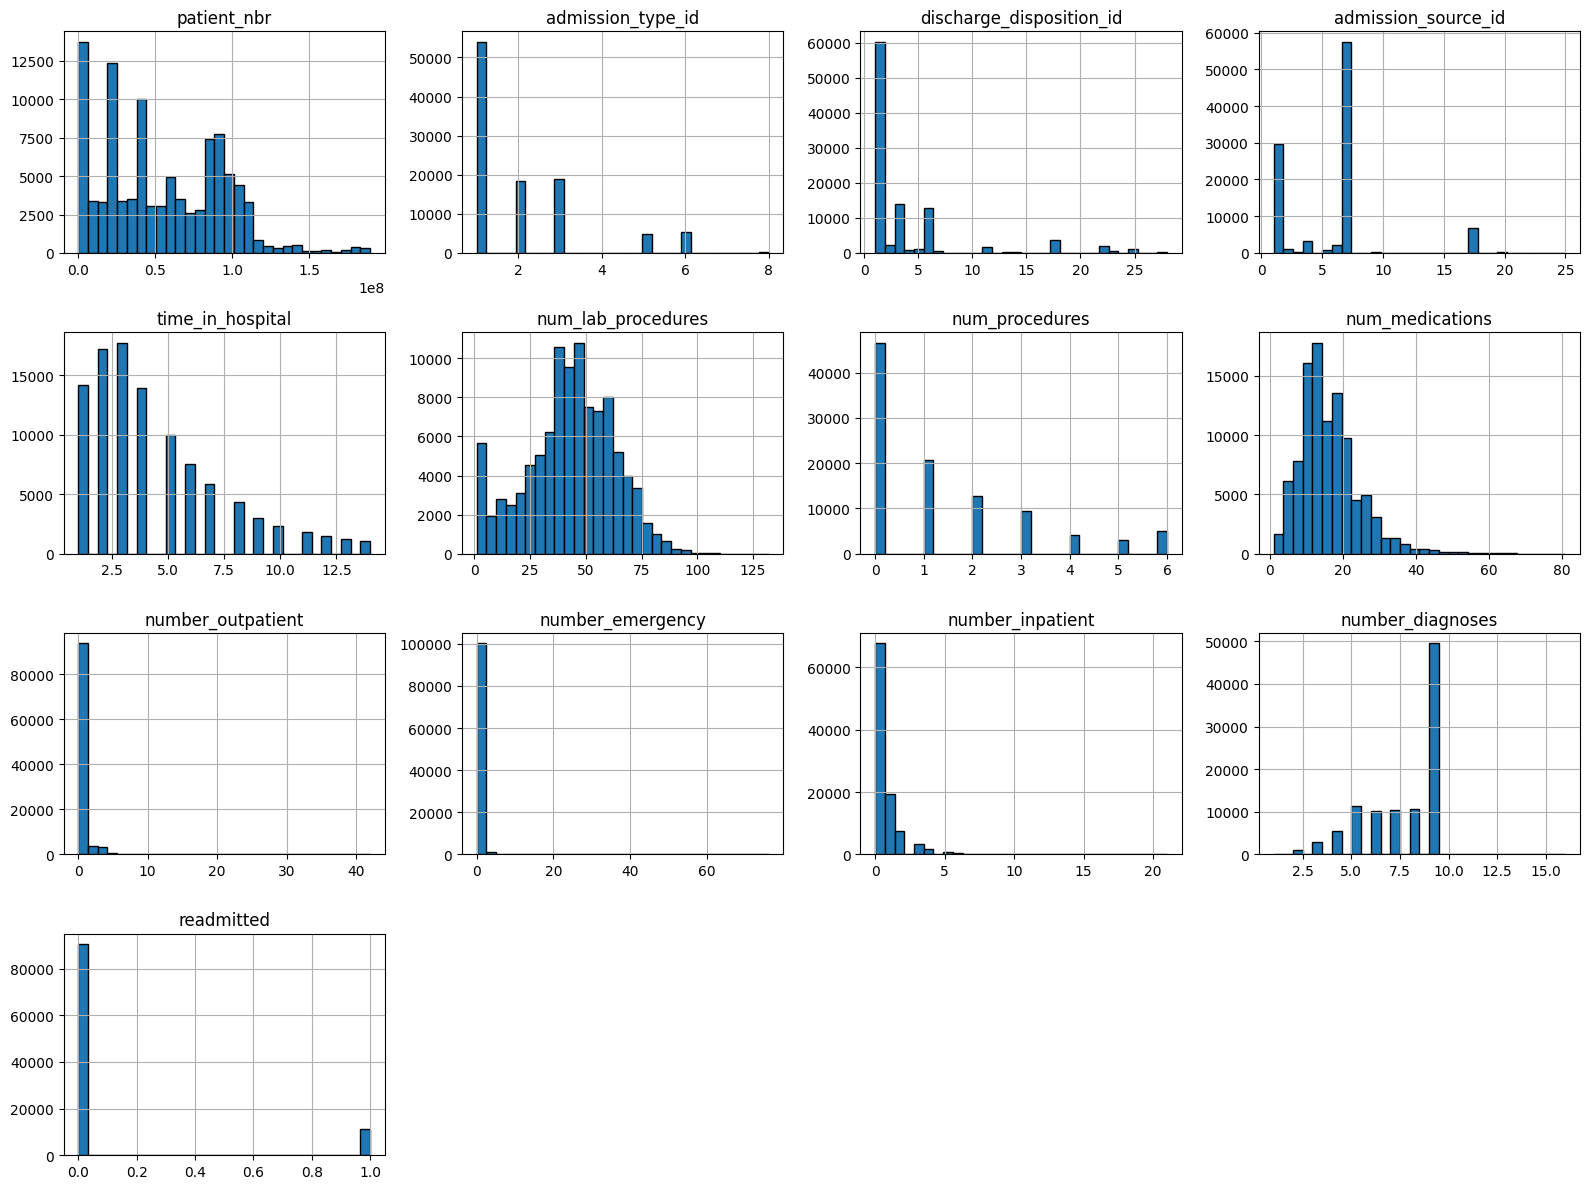

In [45]:
# Histograms for all numeric columns
numeric_cols = diabetic_dropped.select_dtypes(include='number').columns
diabetic_dropped[numeric_cols].hist(bins=30, figsize=(16,12), edgecolor='black')
plt.tight_layout()
plt.show()

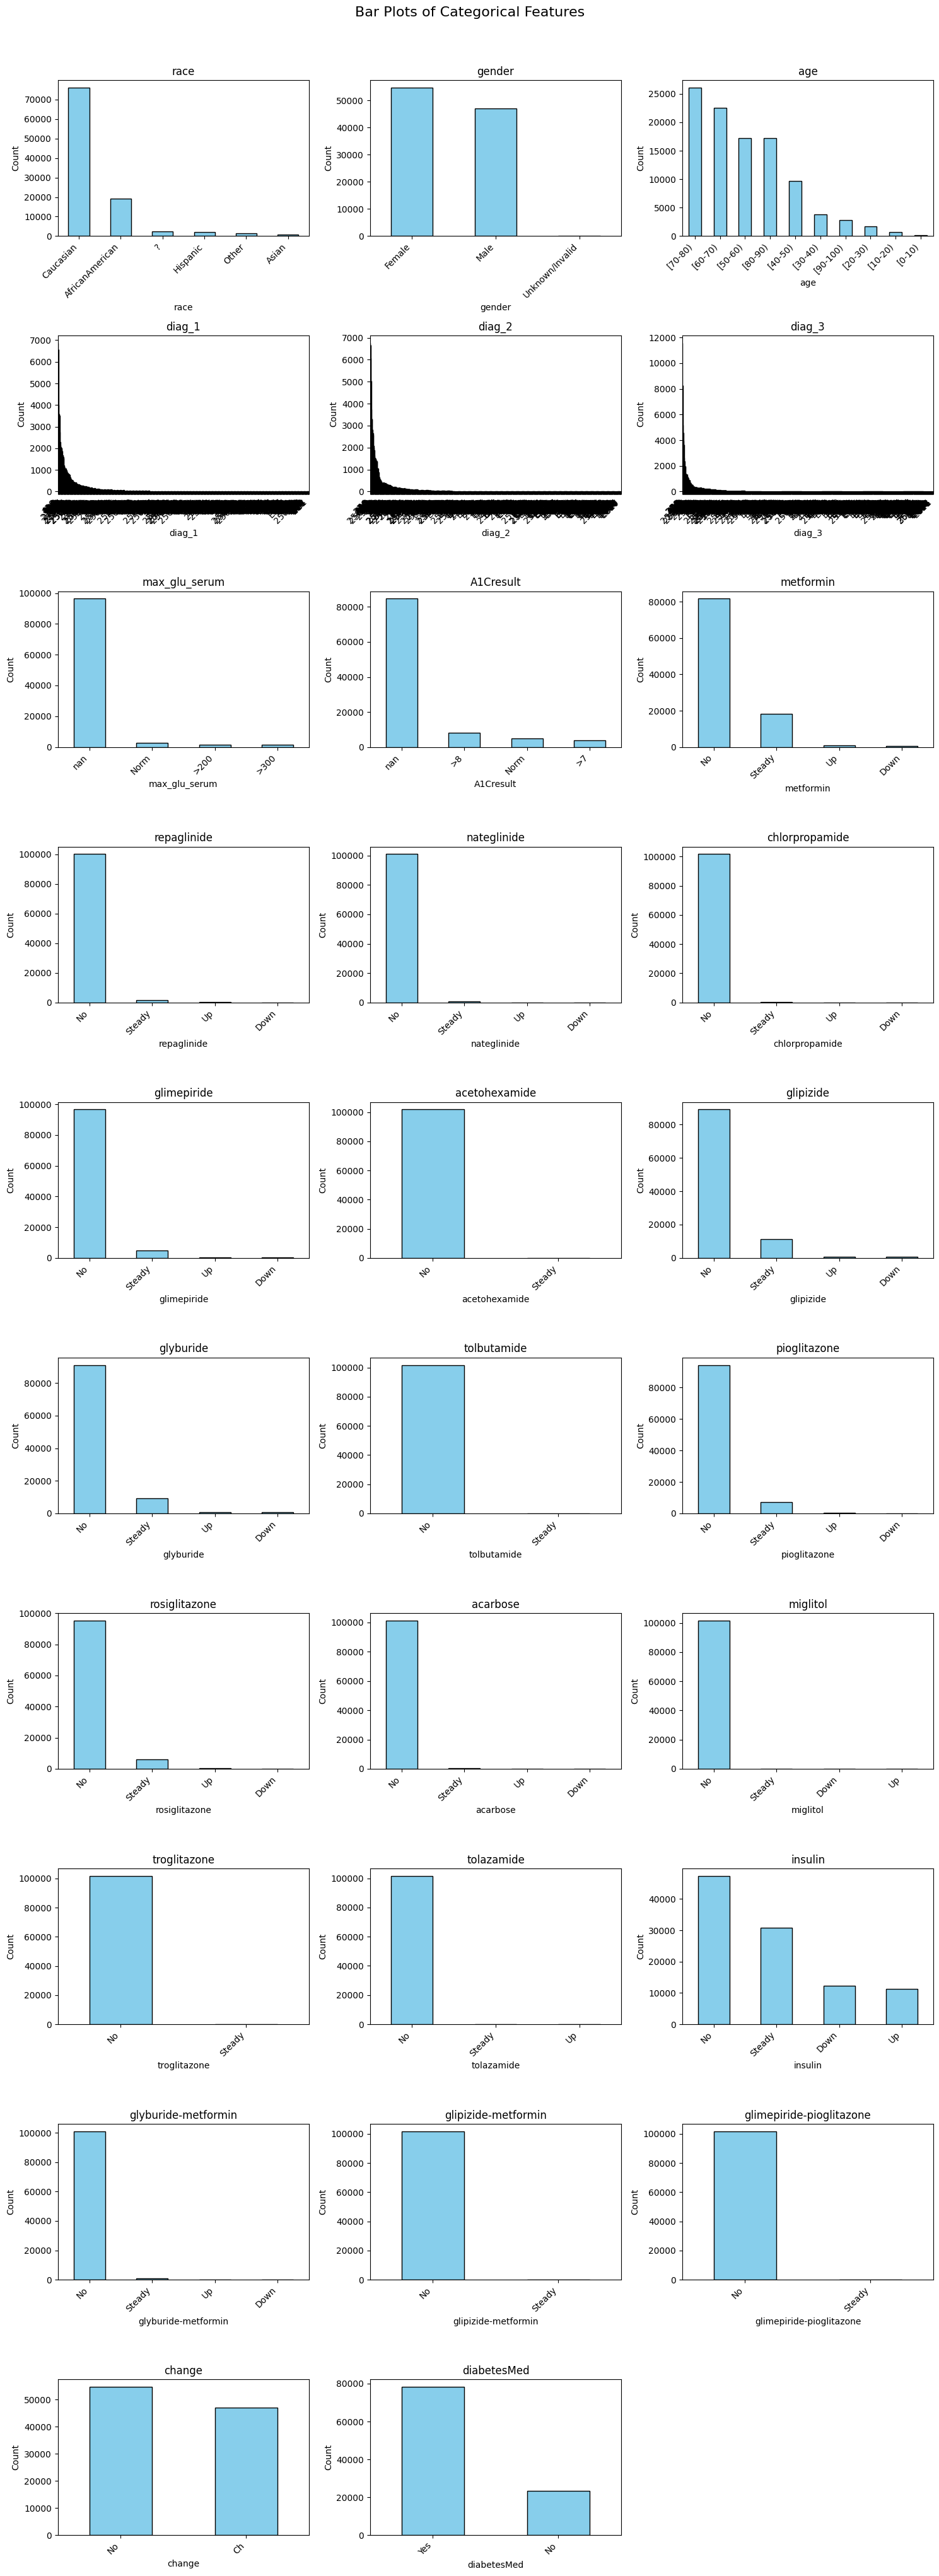

In [46]:
# Bar charts for all categorical columns
categorical_cols = diabetic_dropped.select_dtypes(include='object').columns
# Set up the grid layout
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)  # Ceiling division
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    diabetic_dropped[col].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Bar Plots of Categorical Features', fontsize=16, y=1.02)
plt.show()


In [47]:
diabetic_dropped.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [48]:
# Bar graph for race
import plotly.express as px
race_counts = diabetic_dropped['race'].value_counts().reset_index()
race_counts['race'] = race_counts['race'].replace({'?':'Unknown'})
race_counts['percentage'] = (race_counts['count'] / race_counts['count'].sum()) * 100
race_bar_graph = px.bar(race_counts, x='race', y = 'percentage', title="Distribution of Patients' Races (%)", text=race_counts['percentage'].apply(lambda x: f'{x:0.2f}%'))
race_bar_graph.update_traces(
    hovertemplate='<b>%{x}</b><br>Count: %{customdata}<extra></extra>',
    customdata=race_counts['count'],
    textposition = 'outside'
)
race_bar_graph

In [49]:
race_bar_graph.write_html('race_bar_graph.html')

In [50]:
# lab procedure graph
lab_proc_graph = px.histogram(diabetic_dropped, x='num_lab_procedures', nbins=20, title='Distribution of Number of Lab Procedures per Encounter')

In [51]:
lab_proc_graph.write_html('lab_proc_graph.html')

In [52]:
diabetic_dropped['num_lab_procedures'].describe()

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64

In [53]:
# Bar graph for race
import plotly.express as px
max_glu_counts = diabetic_dropped['max_glu_serum'].value_counts().reset_index()
max_glu_counts['percentage'] = (max_glu_counts['count'] / max_glu_counts['count'].sum()) * 100
max_glu_graph = px.bar(max_glu_counts, x='max_glu_serum', y = 'percentage', title="Distribution of Maximum Glucose Serum in Blood", text=max_glu_counts['percentage'].apply(lambda x: f'{x:0.2f}%'))
max_glu_graph.update_traces(
    hovertemplate='<b>%{x}</b><br>Count: %{customdata}<extra></extra>',
    customdata=race_counts['count'],
    textposition = 'outside'
)
max_glu_graph

In [54]:
max_glu_graph.write_html('max_glu_graph.html')

In [ ]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin']
tested = {}
for drug in drugs:
    tested[drug] = (diabetic_dropped[drug] != 'No').sum()
drug_usage_df = pd.DataFrame.from_dict(tested, orient='index', columns=['Times Used'])
drug_usage_df = drug_usage_df.sort_values(by='Times Used', ascending=False)
drug_usage_df.iloc[0:5]

,Times Used
insulin,54383
metformin,19988
glipizide,12686
glyburide,10650
pioglitazone,7328


In [69]:
combo_meds = ['glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone']
combo_tested = {}
for drug in combo_meds:
    combo_tested[drug] = (diabetic_dropped[drug] != 'No').sum()
combo_drug_usage = pd.DataFrame.from_dict(combo_tested, orient='index', columns=['Times Used'])
combo_drug_usage = combo_drug_usage.sort_values(by='Times Used', ascending=False)
combo_drug_usage.iloc[0:5]

,Times Used
glyburide-metformin,706
glipizide-metformin,13
glimepiride-pioglitazone,1


In [ ]:
diabetic_dropped['metformin']

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')